<a href="https://colab.research.google.com/github/hashas/DS-Unit-1-Build/blob/master/DS9_Unit_1_Build_HASAN_HASAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
from google.colab import files
uploaded = files.upload()

Saving epldata_final.csv to epldata_final (1).csv


# Data Exploration

In [135]:
# data exploration

import pandas as pd
df = pd.read_csv('epldata_final.csv')
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [137]:
df.tail()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.40%,38,2.0,Switzerland,0,1,20,0,1
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.20%,34,4.0,Congo DR,0,2,20,0,1
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.30%,29,1.0,England,0,2,20,0,0
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,5.90%,16,1.0,England,0,1,20,0,1
460,Diafra Sakho,West+Ham,27,CF,1,10.0,214,5.5,0.10%,12,4.0,Senegal,0,3,20,0,0


In [139]:
df.shape

(461, 17)

In [140]:
df.describe()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,460.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,57.314534,1.993478,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,53.113811,0.957689,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


In [141]:
df.describe(exclude='number')

,name,club,position,fpl_sel,nationality
count,461,461,461,461,461
unique,461,20,13,113,61
top,Kelechi Iheanacho,Huddersfield,CB,0.10%,England
freq,1,28,85,64,156


In [142]:
df.dtypes

name             object
club             object
age               int64
position         object
position_cat      int64
market_value    float64
page_views        int64
fpl_value       float64
fpl_sel          object
fpl_points        int64
region          float64
nationality      object
new_foreign       int64
age_cat           int64
club_id           int64
big_club          int64
new_signing       int64
dtype: object

In [143]:
df.count()

name            461
club            461
age             461
position        461
position_cat    461
market_value    461
page_views      461
fpl_value       461
fpl_sel         461
fpl_points      461
region          460
nationality     461
new_foreign     461
age_cat         461
club_id         461
big_club        461
new_signing     461
dtype: int64

# Cleaning Data

In [144]:
# identifying null values
df.isnull().sum()

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          1
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

In [145]:
df['region'].tail(50)

411    2.0
412    4.0
413    3.0
414    1.0
415    3.0
416    2.0
417    2.0
418    2.0
419    1.0
420    2.0
421    3.0
422    2.0
423    1.0
424    2.0
425    1.0
426    2.0
427    2.0
428    2.0
429    1.0
430    4.0
431    1.0
432    3.0
433    2.0
434    2.0
435    1.0
436    1.0
437    2.0
438    4.0
439    2.0
440    3.0
441    1.0
442    4.0
443    2.0
444    4.0
445    4.0
446    1.0
447    2.0
448    2.0
449    1.0
450    2.0
451    1.0
452    2.0
453    4.0
454    2.0
455    3.0
456    2.0
457    4.0
458    1.0
459    1.0
460    4.0
Name: region, dtype: float64

In [146]:
df[df.isna().any(axis=1)]

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
188,Steve Mounie,Huddersfield,22,CF,1,5.5,56,6.0,0.60%,0,NaN,Benin,0,2,8,0,0


In [0]:
# cleaning data - replacing NaN value in 'region' variable with the appropriate classification for the player
import numpy as np
df = df.replace(np.NaN, 4.0)

In [148]:
df.isnull().sum()

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          0
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

# **Visualizations**

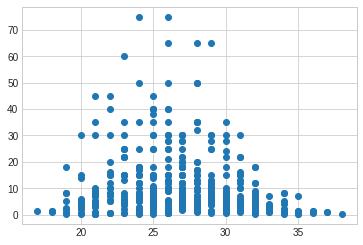

In [149]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')

plt.plot(df['age'], df['market_value'], 'o');

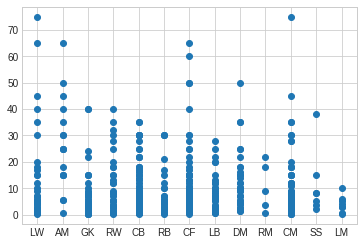

In [150]:
plt.plot(df['position'], df['market_value'], 'o');

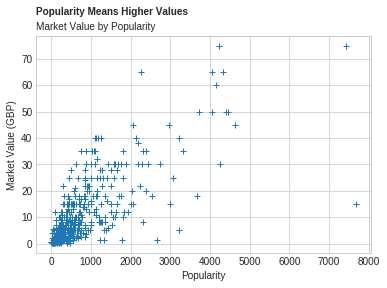

In [159]:
plt.plot(df['page_views'], df['market_value'], '+');
plt.suptitle("Popularity Means Higher Values", fontsize=10, verticalalignment='top', fontweight='bold', x=0.3)
plt.title("Market Value by Popularity", fontsize=10, x=0.177)
plt.xlabel('Popularity')
plt.ylabel('Market Value (GBP)');

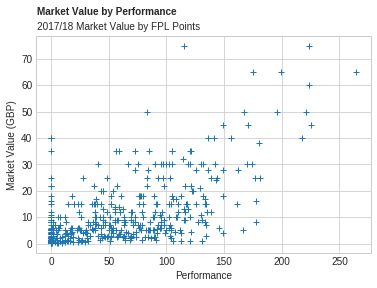

In [158]:
plt.plot(df['fpl_points'], df['market_value'], '+');
plt.suptitle("Market Value by Performance", fontsize=10, verticalalignment='top', x=0.289, fontweight='bold')
plt.title("2017/18 Market Value by FPL Points", fontsize=10, x=0.248)
plt.xlabel('Performance')
plt.ylabel('Market Value (GBP)');

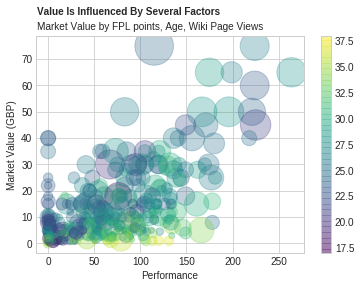

In [157]:
plt.scatter(df['fpl_points'], df['market_value'], alpha=0.3, s=df['page_views']/5, c=df['age'], cmap='viridis');
plt.colorbar()
# ax.set_title("Big scorers, big earners", fontsize=20, fontweight='bold')
plt.suptitle("Value Is Influenced By Several Factors", fontsize=10, verticalalignment='top', fontweight='bold', x=0.34)
plt.title("Market Value by FPL points, Age, Wiki Page Views", fontsize=10, x=0.425)
plt.xlabel('Performance')
plt.ylabel('Market Value (GBP)');

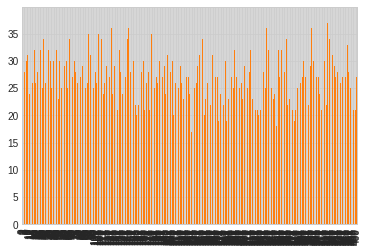

In [155]:
df['age'].plot.bar(color='C1');

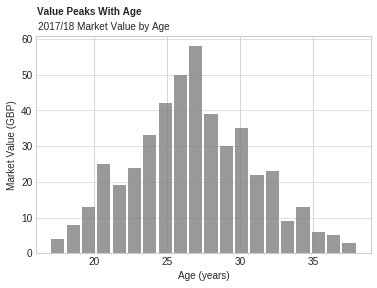

In [156]:
plt.hist(df['age'], bins=20, color='gray', alpha=0.8, rwidth=0.85);
plt.suptitle("Value Peaks With Age", fontsize=10, verticalalignment='top', fontweight='bold', x=0.248)
plt.title("2017/18 Market Value by Age", fontsize=10, x=0.202)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Age (years)')
plt.ylabel('Market Value (GBP)');

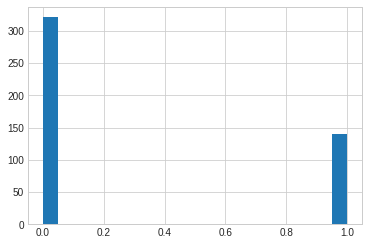

In [24]:
plt.hist(df['big_'], bins=20);

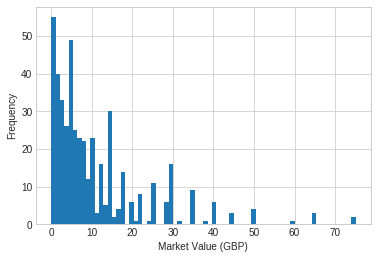

In [90]:
plt.hist(df['market_value'], bins=70);
plt.xlabel('Market Value (GBP)')
plt.ylabel('Frequency');